In [622]:
import sklearn as skl
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.cluster import KMeans

RANDOM_SEED = 2022

# Data Visualization

In [557]:
#Read CSV file
db = pd.read_csv('../datasets/training_data.csv')
test = pd.read_csv('../datasets/test_data.csv')

In [558]:
# See first 5 lines
db.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [559]:
#See all Stats
db.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


In [560]:
# See column names
db.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

In [561]:
# Check null values
db.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

In [562]:
#Check missing values
db.isna().any()

city_name             False
magnitude_of_delay    False
delay_in_seconds      False
affected_roads         True
record_date           False
luminosity            False
avg_temperature       False
avg_atm_pressure      False
avg_humidity          False
avg_wind_speed        False
avg_precipitation     False
avg_rain              False
incidents             False
dtype: bool

In [563]:
#Check duplicates
db.duplicated().sum()

0

In [564]:
# See types of each attribute
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [565]:
# See number of different values of each attribute
db.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
affected_roads         678
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [566]:
# See content of first 5 lines of attribute 'Affected Roads' 
db['affected_roads'].head()

0                                                    ,
1                                                N101,
2                                                    ,
3    N101,R206,N105,N101,N101,N101,N101,N101,N101,N...
4                            N101,N101,N101,N101,N101,
Name: affected_roads, dtype: object

In [567]:
db['magnitude_of_delay'].value_counts()

UNDEFINED    4314
MAJOR         678
MODERATE        8
Name: magnitude_of_delay, dtype: int64

In [568]:
db['luminosity'].value_counts()

DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64

In [569]:
db['avg_rain'].value_counts()

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64

In [570]:
db['incidents'].value_counts()

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64

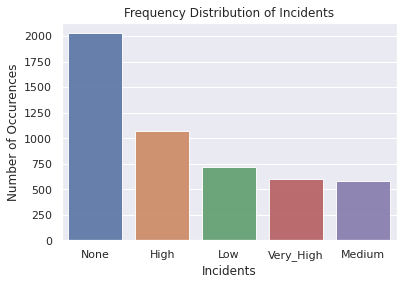

In [571]:
# See Level of Incidents distribution
incidents_count = db['incidents'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x = incidents_count.index, y = incidents_count.values, alpha=0.9)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Incidents',fontsize=12)
plt.show()

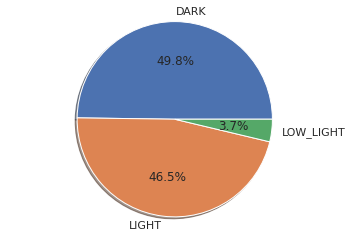

In [572]:
# See Luminosity distribution
labels=db['luminosity'].astype('category').cat.categories.tolist()
counts=db['luminosity'].value_counts()
sizes=[counts[var_cat] for var_cat in labels]
fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

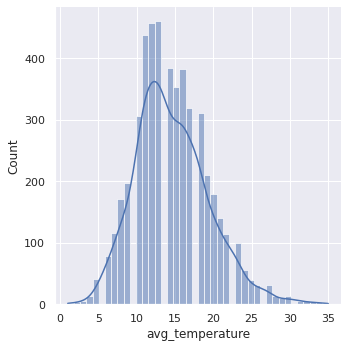

In [573]:
# See Average Temperature distribution
sns.displot(db, x="avg_temperature", kde=True)

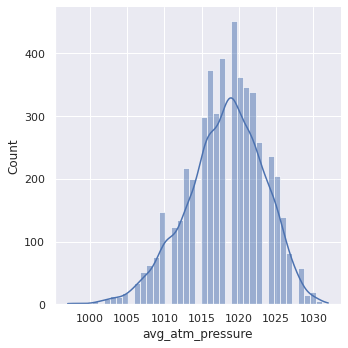

In [574]:
# See Average Atmospheric Pressure distribution
sns.displot(db, x="avg_atm_pressure", kde=True)

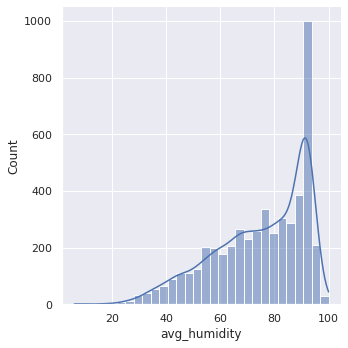

In [575]:
# See Average Humidity distribution
sns.displot(db, x="avg_humidity", kde=True)

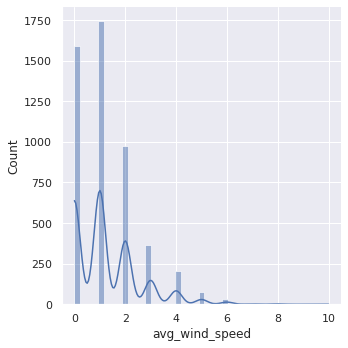

In [576]:
# See Average Wind Speed distribution
sns.displot(db, x="avg_wind_speed", kde=True)

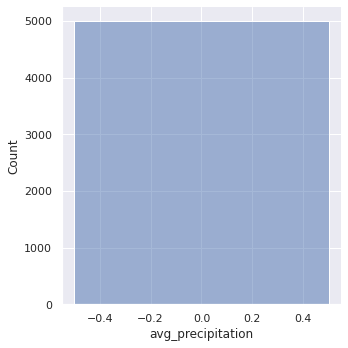

In [577]:
# See Average Precipitation distribution
sns.displot(db, x="avg_precipitation", kde=True)

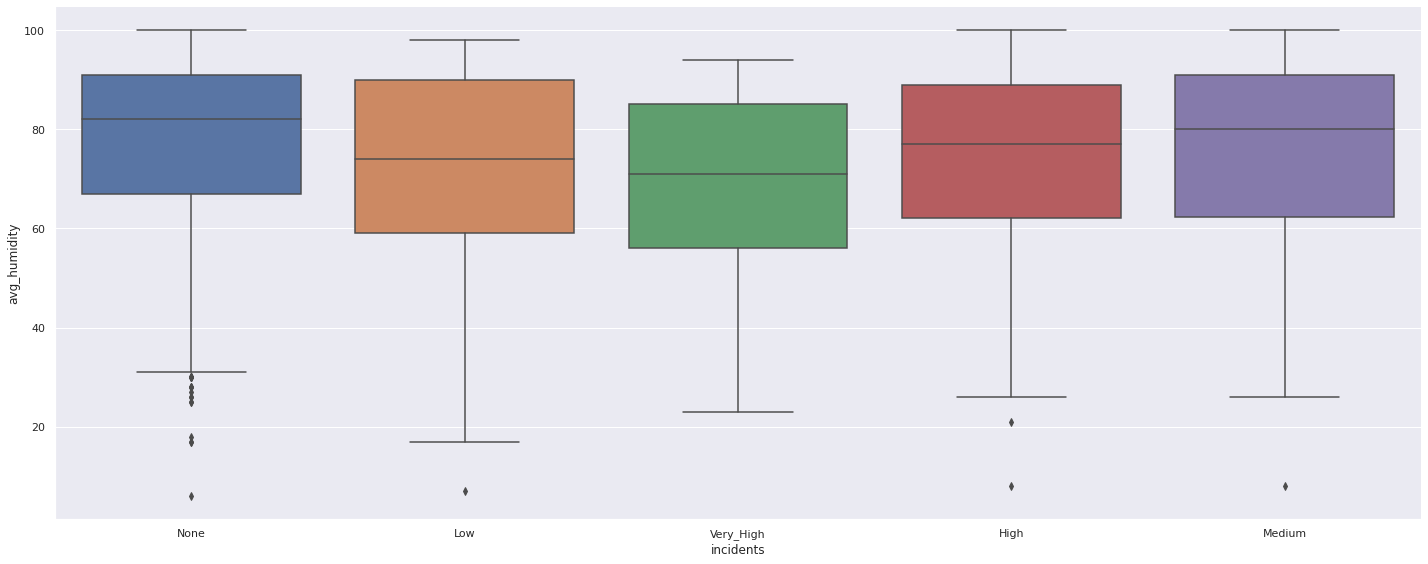

In [578]:
# Relationship between the level of incidents and the humidity
sns.catplot( x="incidents", y="avg_humidity", data=db, kind="box", height=8, aspect=2.5)
plt.show()

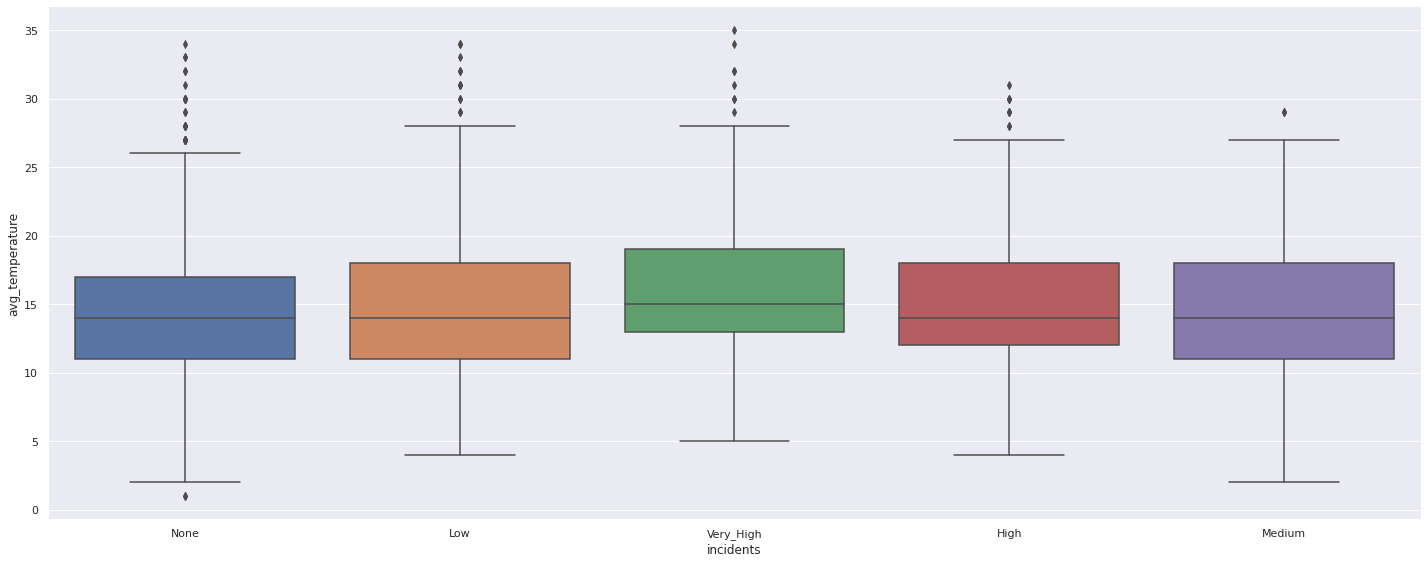

In [579]:
# Relationship between the level of incidents and the temperature
sns.catplot( x="incidents", y="avg_temperature", data=db, kind="box", height=8, aspect=2.5)
plt.show()

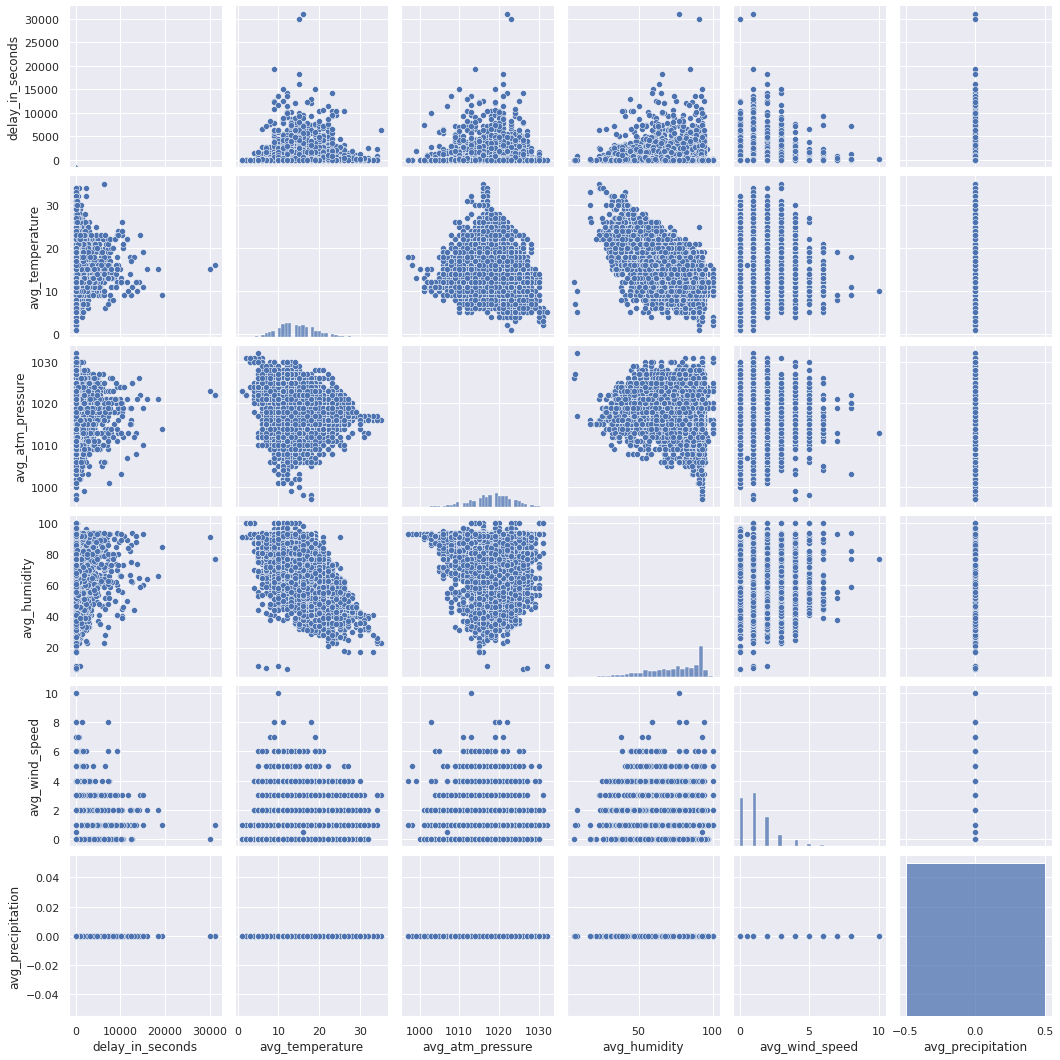

In [580]:
sns.pairplot(db)

<AxesSubplot:>

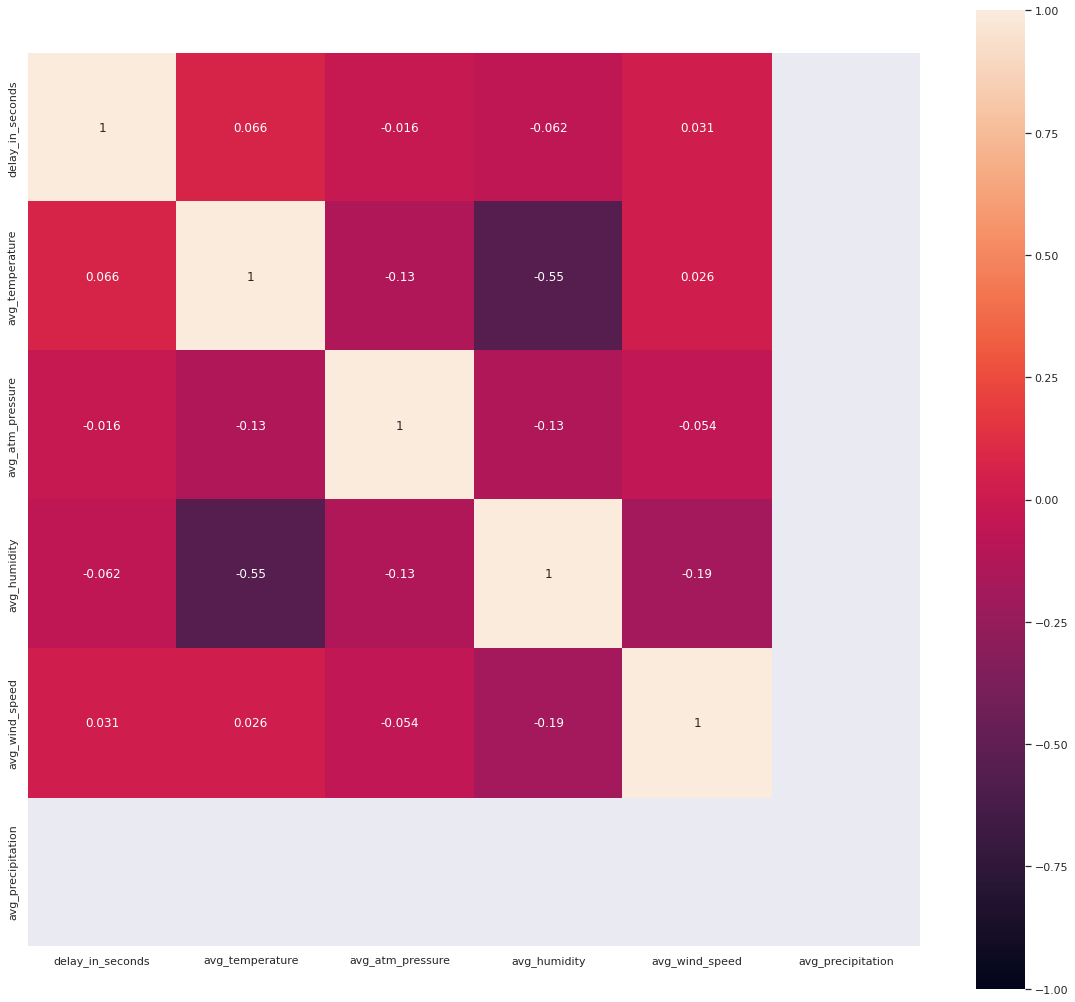

In [581]:
# Correlation between all data
corr_matrix = db.corr()
f,ax = plt.subplots(figsize=(20,18))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,square=True,annot=True)


# Data Preparation

In [582]:
#Drop columns in Training Data
db.drop(['city_name'],axis=1,inplace=True)
db.drop(['affected_roads'],axis=1,inplace=True)
db.drop(['avg_precipitation'],axis=1,inplace=True)
db.drop(['magnitude_of_delay'],axis=1,inplace=True)
db.dropna(inplace=True)

In [583]:
#Drop columns in Test Data
test.drop(['city_name'],axis=1,inplace=True)
test.drop(['affected_roads'],axis=1,inplace=True)
test.drop(['avg_precipitation'],axis=1,inplace=True)
test.drop(['magnitude_of_delay'],axis=1,inplace=True)
test.dropna(inplace=True)

### Label encoding ( luminosity, magnitude_of_delay, avg_rain, incidents)

In [584]:
# Label Enconding: Incidents
replace_map = {'None':0,'Low':1,'Medium':2, 'High':3, 'Very_High':4}
db['incidents'] = db['incidents'].replace(replace_map)

In [585]:
# Label Enconding: Luminosity
labels = db['luminosity'].astype('category').cat.categories.tolist()
replace_map_lum={'luminosity':{k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
db.replace(replace_map_lum, inplace=True)
test.replace(replace_map_lum, inplace=True)
print(replace_map_lum)

{'luminosity': {'DARK': 1, 'LIGHT': 2, 'LOW_LIGHT': 3}}


In [586]:
# Label Enconding: Average Rain
labels = db['avg_rain'].astype('category').cat.categories.tolist()
replace_map_rain={'avg_rain':{k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
db.replace(replace_map_rain, inplace=True)
test.replace(replace_map_rain, inplace=True)
print(replace_map_rain)

{'avg_rain': {'Sem Chuva': 1, 'chuva forte': 2, 'chuva fraca': 3, 'chuva moderada': 4}}


In [587]:
db.head()

,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,0,2021-03-15 23:00,1,12.0,1013.0,70.0,1.0,1,0
1,385,2021-12-25 18:00,1,12.0,1007.0,91.0,1.0,1,0
2,69,2021-03-12 15:00,2,14.0,1025.0,64.0,0.0,1,1
3,2297,2021-09-29 09:00,2,15.0,1028.0,75.0,1.0,1,4
4,0,2021-06-13 11:00,2,27.0,1020.0,52.0,1.0,1,3


In [588]:
# Handle dates
db['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [589]:
db['record_date'] = pd.to_datetime(db['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')

In [590]:
assert db['record_date'].isnull().sum()==0, 'missing record date'
db['record_date'].head()

0   2021-03-15 23:00:00
1   2021-12-25 18:00:00
2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
Name: record_date, dtype: datetime64[ns]

In [591]:
#Create new columns from 'record date'
db['year'] = db['record_date'].dt.year
db['month'] = db['record_date'].dt.month
db['day'] = db['record_date'].dt.day
db['hour'] = db['record_date'].dt.hour
db['minute'] = db['record_date'].dt.minute

In [592]:
db.head()

,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,year,month,day,hour,minute
0,0,2021-03-15 23:00:00,1,12.0,1013.0,70.0,1.0,1,0,2021,3,15,23,0
1,385,2021-12-25 18:00:00,1,12.0,1007.0,91.0,1.0,1,0,2021,12,25,18,0
2,69,2021-03-12 15:00:00,2,14.0,1025.0,64.0,0.0,1,1,2021,3,12,15,0
3,2297,2021-09-29 09:00:00,2,15.0,1028.0,75.0,1.0,1,4,2021,9,29,9,0
4,0,2021-06-13 11:00:00,2,27.0,1020.0,52.0,1.0,1,3,2021,6,13,11,0


In [593]:
# Unique values
print("Unique Values")
print("Year: " + str(db['year'].nunique()))
print("Month: " + str(db['month'].nunique()))
print("Day: " + str(db['day'].nunique()))
print("Hour: " + str(db['hour'].nunique()))
print("Minute: " + str(db['minute'].nunique()))

Unique Values
Year: 1
Month: 11
Day: 31
Hour: 24
Minute: 1


In [594]:
#Ano e minuto só têm 1 valor, logo vamos retirar esses parâmetros
db.drop('year',axis=1,inplace=True)
db.drop('minute',axis=1,inplace=True)
db.drop('record_date',axis=1,inplace=True)
db.dropna(inplace=True)

In [595]:
db.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,month,day,hour
0,0,1,12.0,1013.0,70.0,1.0,1,0,3,15,23
1,385,1,12.0,1007.0,91.0,1.0,1,0,12,25,18
2,69,2,14.0,1025.0,64.0,0.0,1,1,3,12,15
3,2297,2,15.0,1028.0,75.0,1.0,1,4,9,29,9
4,0,2,27.0,1020.0,52.0,1.0,1,3,6,13,11


# Decision Tree Classifier

In [596]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   delay_in_seconds  5000 non-null   int64  
 1   luminosity        5000 non-null   int64  
 2   avg_temperature   5000 non-null   float64
 3   avg_atm_pressure  5000 non-null   float64
 4   avg_humidity      5000 non-null   float64
 5   avg_wind_speed    5000 non-null   float64
 6   avg_rain          5000 non-null   int64  
 7   incidents         5000 non-null   int64  
 8   month             5000 non-null   int64  
 9   day               5000 non-null   int64  
 10  hour              5000 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 468.8 KB


In [597]:
x = db.drop(['incidents'], axis=1)
y = db['incidents'].to_frame()

In [598]:
print(y.shape)

(5000, 1)


In [599]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=RANDOM_SEED)
print("X %s; X_train %s; X_test %s" %(x.shape,X_train.shape,X_test.shape))
print("y %s; y_train %s; y_test %s" %(y.shape,y_train.shape,y_test.shape))

X (5000, 10); X_train (3750, 10); X_test (1250, 10)
y (5000, 1); y_train (3750, 1); y_test (1250, 1)


In [600]:
clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
clf.fit(X_train,np.ravel(y_train))

DecisionTreeClassifier(random_state=2022)

In [601]:
pred_dtc = clf.predict(X_test)

In [602]:
accuracy_score(y_test,pred_dtc)

0.8952

In [603]:
precision_score(y_test,pred_dtc,average='micro')

0.8952

In [604]:
recall_score(y_test,pred_dtc,average='micro')

0.8952

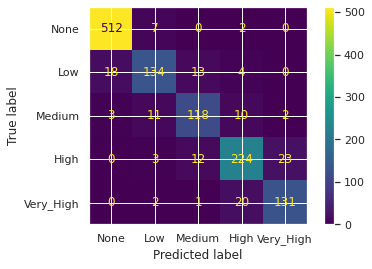

In [605]:
cm = confusion_matrix(y_test, pred_dtc)
cmd = ConfusionMatrixDisplay(cm, display_labels=['None', 'Low', 'Medium', 'High', 'Very_High'])
cmd.plot()

# SVC Model

### Cross Validation

In [606]:
cross_val_model = SVC(random_state=RANDOM_SEED)
scores = cross_val_score(cross_val_model,x,np.ravel(y),cv=10)
scores

array([0.544, 0.526, 0.566, 0.556, 0.566, 0.556, 0.55 , 0.534, 0.55 ,
       0.546])

In [607]:
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f \n" % (scores.mean(), scores.std()))

RESULT: 0.55 accuracy with a standard deviation of 0.01 



### Hold-out

In [608]:
model = SVC(random_state=RANDOM_SEED)
model.fit(X_train,np.ravel(y_train))

SVC(random_state=2022)

In [609]:
predictions = model.predict(X_test)

In [610]:
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))

0.57 accuracy


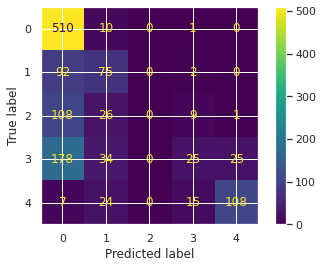

In [611]:
plot_confusion_matrix(model, X_test, y_test)

### Grid Search

In [614]:
param_grid = {'C' : [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(random_state=RANDOM_SEED),param_grid,refit=True,verbose=3)

In [616]:
grid.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.403 total time=   1.3s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.401 total time=   1.2s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.401 total time=   1.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.401 total time=   1.2s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.403 total time=   1.2s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.403 total time=   0.9s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.401 total time=   1.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.401 total time=   0.9s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.401 total time=   0.9s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.403 total time=   1.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.424 total time=   0.7s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(random_state=2022),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [617]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [618]:
grid.best_estimator_

SVC(C=1000, gamma=0.001, random_state=2022)

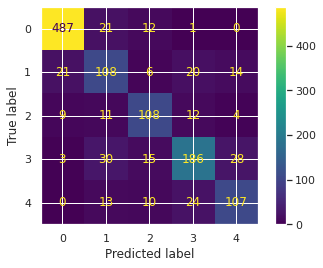

In [619]:
plot_confusion_matrix(grid, X_test, y_test)

In [620]:
grid_predicitions = grid.predict(X_test)

In [624]:
print(classification_report(y_test, grid_predicitions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       521
           1       0.59      0.64      0.61       169
           2       0.72      0.75      0.73       144
           3       0.77      0.71      0.74       262
           4       0.70      0.69      0.70       154

    accuracy                           0.80      1250
   macro avg       0.74      0.75      0.74      1250
weighted avg       0.80      0.80      0.80      1250



# K-means CLustering

In [613]:
kmeans = KMeans(n_clusters=5, random_state=RANDOM_SEED)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=2022)